In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv("CarPrice.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [15]:
data.shape

(205, 15)

In [16]:
data.sample(10)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,1,93.7,167.3,63.8,50.8,2191,98,2.97,3.23,9.4,68,5500,31,38,7609.0
70,-1,115.6,202.6,71.7,56.3,3770,183,3.58,3.64,21.5,123,4350,22,25,31600.0
49,0,102.0,191.7,70.6,47.8,3950,326,3.54,2.76,11.5,262,5000,13,17,36000.0
14,1,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121,4250,20,25,24565.0
20,0,94.5,158.8,63.6,52.0,1909,90,3.03,3.11,9.6,70,5400,38,43,6575.0
157,0,95.7,166.3,64.4,52.8,2109,98,3.19,3.03,9.0,70,4800,30,37,7198.0
46,2,96.0,172.6,65.2,51.4,2734,119,3.43,3.23,9.2,90,5000,24,29,11048.0
69,0,106.7,187.5,70.3,54.9,3495,183,3.58,3.64,21.5,123,4350,22,25,28176.0
126,3,89.5,168.9,65.0,51.6,2756,194,3.74,2.90,9.5,207,5900,17,25,32528.0
106,1,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.0,160,5200,19,25,18399.0


In [3]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [17]:
data[data.duplicated()]

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
119,1,93.7,157.3,63.8,50.8,2128,98,3.03,3.39,7.6,102,5500,24,30,7957.0
120,1,93.7,157.3,63.8,50.6,1967,90,2.97,3.23,9.4,68,5500,31,38,6229.0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [18]:
data.isnull().sum()


symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [19]:
data.corr()['price']

symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [5]:
data.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [25]:
data.corr()['price']


symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [6]:
data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [26]:
data.sample(5)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
42,1,96.5,169.1,66.0,51.0,2293,110,3.15,3.58,9.1,100,5500,25,31,10345.0
152,1,95.7,158.7,63.6,54.5,2015,92,3.05,3.03,9.0,62,4800,31,38,6488.0
97,1,94.5,170.2,63.8,53.5,2037,97,3.15,3.29,9.4,69,5200,31,37,7999.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
36,0,96.5,157.1,63.9,58.3,2024,92,2.92,3.41,9.2,76,6000,30,34,7295.0


C:\Users\raksh\AppData\Local\Temp\ipykernel_11236\3510825061.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.price)


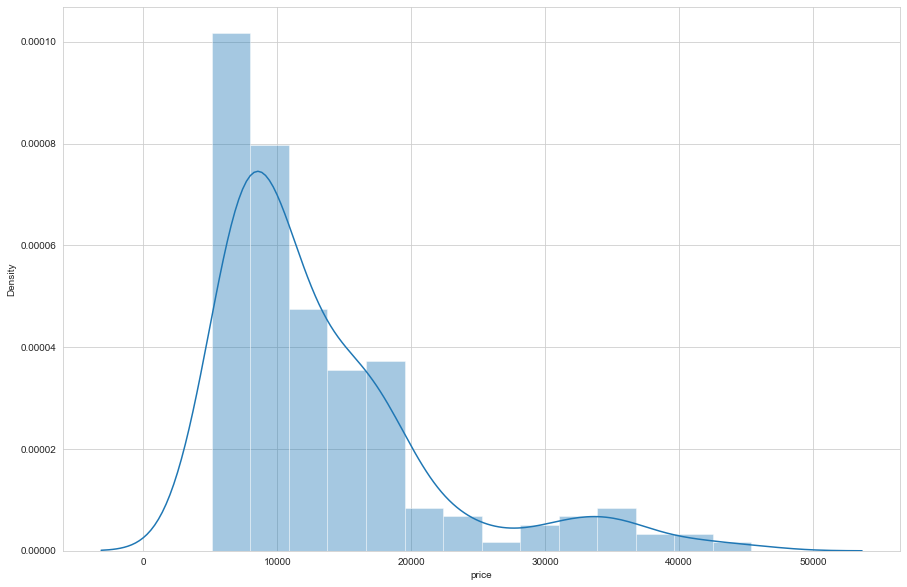

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.price)
plt.show()

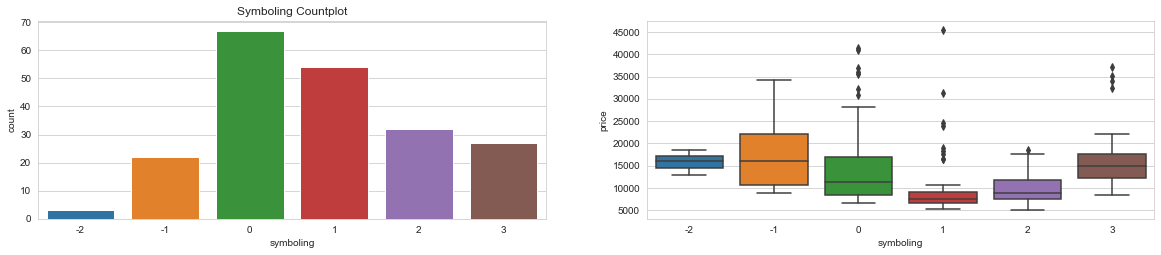

In [31]:
plt.figure(figsize=(20, 8))

plt.subplot(2,2,1)
sns.countplot(x='symboling',data = data)
plt.title('Symboling Countplot')

plt.subplot(2,2,2)
plt1 = sns.boxplot(x='symboling',y='price',data = data)

In [8]:
print(data.corr())


                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -

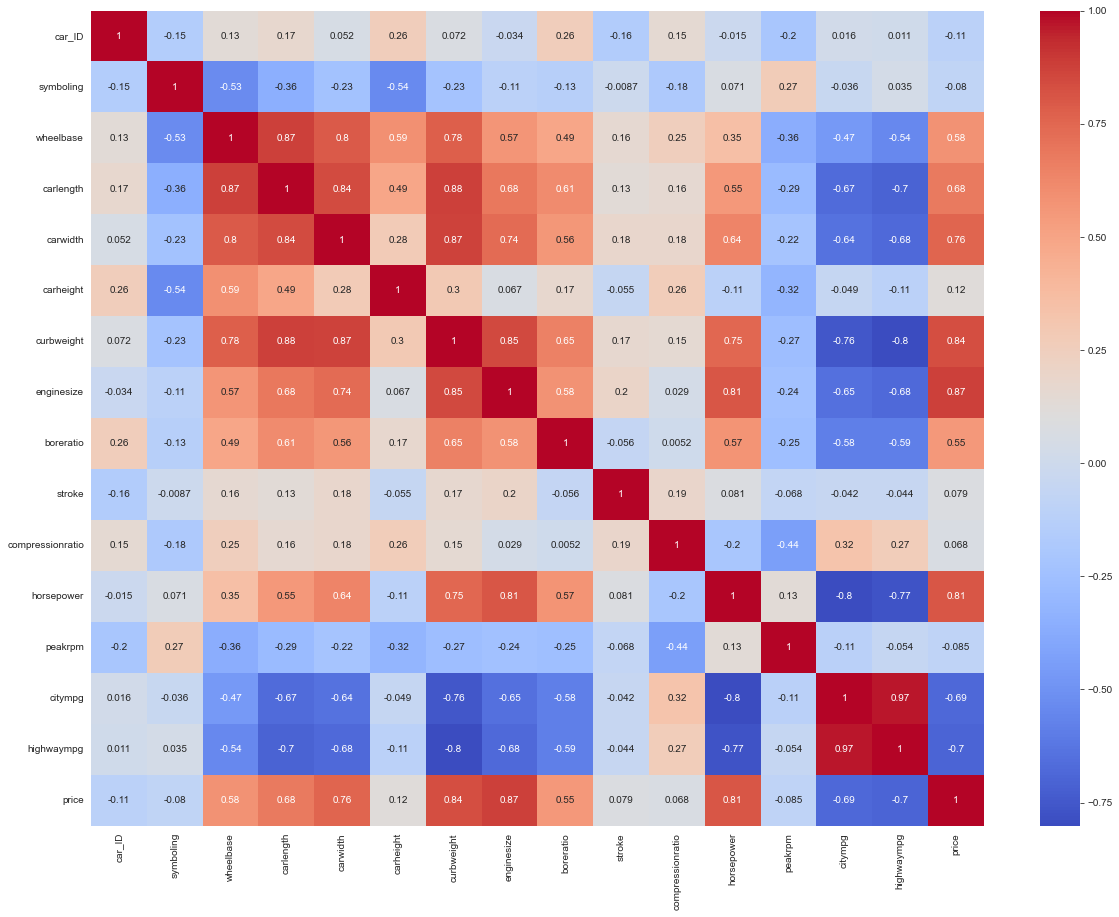

In [9]:
plt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

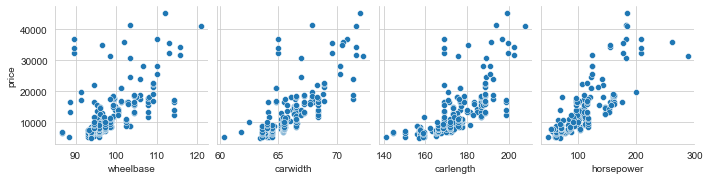

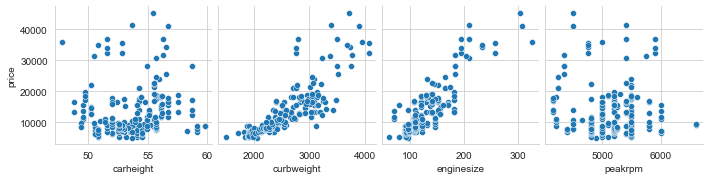

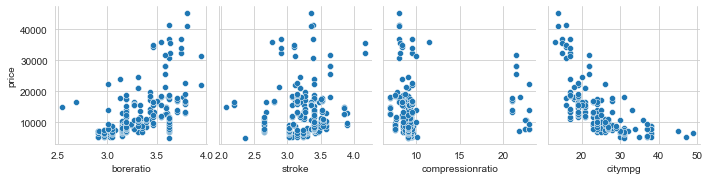

In [38]:
sns.pairplot(x_vars = ['wheelbase','carwidth','carlength','horsepower'],y_vars = ['price'],data = data)
sns.pairplot(x_vars = ['carheight','curbweight','enginesize','peakrpm'],y_vars = ['price'],data = data)
sns.pairplot(x_vars = ['boreratio','stroke','compressionratio','citympg'],y_vars = ['price'],data = data)

In [10]:
predict = "price"
data = data[["symboling", "wheelbase", "carlength", 
             "carwidth", "carheight", "curbweight", 
             "enginesize", "boreratio", "stroke", 
             "compressionratio", "horsepower", "peakrpm", 
             "citympg", "highwaympg", "price"]]
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

C:\Users\raksh\AppData\Local\Temp\ipykernel_11236\938062783.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [12]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
k = model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
predictions

array([13499. , 22470. ,  7150.5,  6479. , 30760. ,  7150.5,  6529. ,
       17075. ,  8189. ,  7957. , 17450. , 31600. , 11199. , 17450. ,
        7126. ,  8058. , 16515. ,  8845. ,  7895. ,  7299. ,  6795. ,
        7957. , 22625. , 14489. , 13499. ,  8249. , 25552. ,  5572. ,
        7198. , 22625. , 30760. , 22470. ,  6795. , 11199. ,  9895. ,
        9295. ,  9279. ,  8916.5,  8189. ,  8195. ,  8778. ])

In [13]:
from sklearn.metrics import mean_absolute_error
model.score(xtest, predictions)

1.0